In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

2024-04-22 23:04:09.339152: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 23:04:11.463537: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-12.4/lib64
2024-04-22 23:04:11.463574: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-04-22 23:04:11.696301: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-22 23:04:17.942

In [3]:
df = pd.read_csv("IMDB.csv")

In [4]:
from sklearn.preprocessing import LabelEncoder
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'Sentiment' column
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

# Display the transformed DataFrame
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
texts = df['review']
labels = df['sentiment']
# Tokenize and pad sequences
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
x = pad_sequences(sequences, maxlen=max_len)
y = labels

import pickle
# Save the tokenizer
with open('tokenizer1.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle)

In [6]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout,MaxPooling1D


#Build a more complex DNN model with LSTM layer
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
model.add(Conv1D(64, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
#model.add(LSTM(64, return_sequences=True))  # LSTM layer added
model.add(Flatten())  # Flatten the output of LSTM
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


# # Build the model
# model = Sequential()
# model.add(Conv1D(64, 5, activation='relu', input_shape=(max_len, 1)))
# model.add(MaxPooling1D(4))
# model.add(Conv1D(64, 5, activation='relu'))
# model.add(MaxPooling1D(4))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

2024-04-22 23:05:31.798297: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-04-22 23:05:31.798337: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pushkar-Nitro-AN515-54): /proc/driver/nvidia/version does not exist
2024-04-22 23:05:32.118533: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           500000    
                                                                 
 conv1d (Conv1D)             (None, 96, 64)            16064     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

In [9]:
# Train the model
history=model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
500/500 [==============================] - 9s 15ms/step - loss: 0.5012 - accuracy: 0.7354 - val_loss: 0.3478 - val_accuracy: 0.8475
Epoch 2/10
500/500 [==============================] - 8s 15ms/step - loss: 0.2689 - accuracy: 0.8929 - val_loss: 0.3112 - val_accuracy: 0.8696
Epoch 3/10
500/500 [==============================] - 8s 17ms/step - loss: 0.1383 - accuracy: 0.9539 - val_loss: 0.3599 - val_accuracy: 0.8649
Epoch 4/10
500/500 [==============================] - 8s 16ms/step - loss: 0.0543 - accuracy: 0.9858 - val_loss: 0.4406 - val_accuracy: 0.8610
Epoch 5/10
500/500 [==============================] - 8s 17ms/step - loss: 0.0171 - accuracy: 0.9967 - val_loss: 0.5660 - val_accuracy: 0.8594
Epoch 6/10
500/500 [==============================] - 9s 17ms/step - loss: 0.0059 - accuracy: 0.9992 - val_loss: 0.6459 - val_accuracy: 0.8604
Epoch 7/10
500/500 [==============================] - 8s 16ms/step - loss: 0.0026 - accuracy: 0.9997 - val_loss: 0.6765 - val_accuracy: 0.8612

In [10]:

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.7339 - accuracy: 0.8588
Test accuracy: 0.8587999939918518


313/313 [==============================] - 1s 3ms/step - loss: 0.7339 - accuracy: 0.8588
Test accuracy: 0.8587999939918518


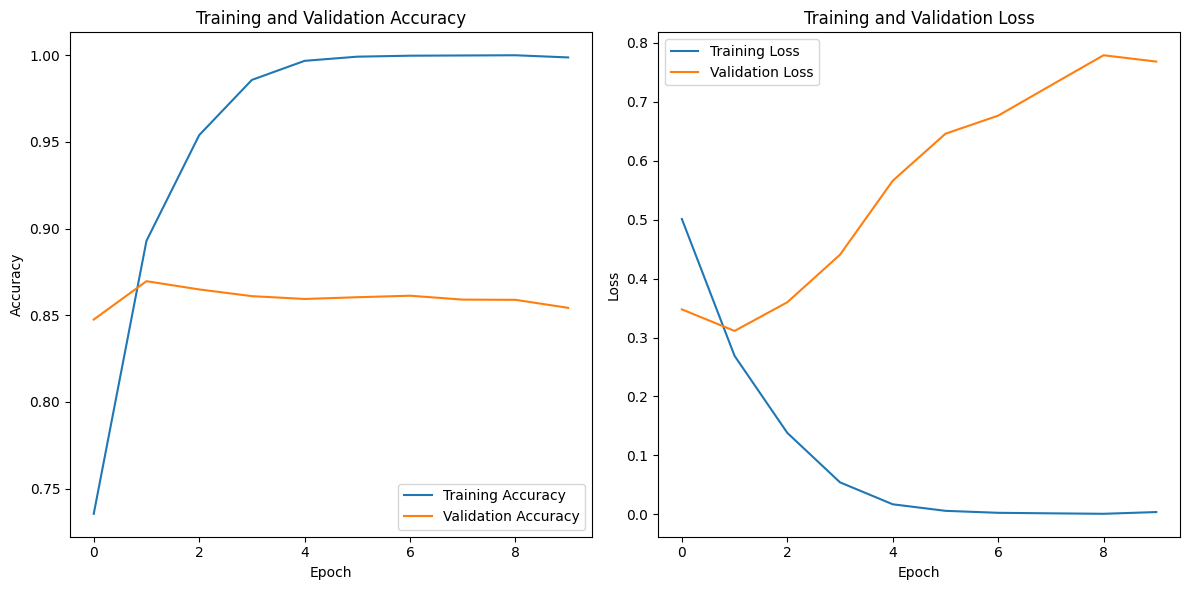

In [11]:
import matplotlib.pyplot as plt
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_history(history)

In [15]:
def predict_sentiment(user_input):
    # Preprocess the input
    sequence = tokenizer.texts_to_sequences([user_input])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)
    
    # Make prediction
    prediction = model.predict(padded_sequence)
    
    # Interpret the prediction
    sentiment = "Positive" if prediction[0][0] > 0.6 else "Negative"
    
    return sentiment

# Take user input and predict sentiment
user_review = input("Enter your movie review: ")
result = predict_sentiment(user_review)
print(f"Sentiment: {result}")

Enter your movie review: dirty movie
1/1 [==============================] - 0s 28ms/step
Sentiment: Positive
